#Investigate the Data


In [104]:
import pandas as pd

In [105]:
df = pd.read_csv("masculinity.csv")
print(df.columns)
print(len(df))

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [106]:
print(df["q0007_0001"].value_counts())

Sometimes                    537
Rarely                       324
Often                        142
Never, but open to it        123
Never, and not open to it     53
No answer                     10
Name: q0007_0001, dtype: int64


In [107]:
print(df.head(2))


   Unnamed: 0     StartDate       EndDate  ...          kids   orientation    weight
0           1  5/10/18 4:01  5/10/18 4:06  ...   No children  Gay/Bisexual  1.714026
1           2  5/10/18 6:30  5/10/18 6:53  ...  Has children      Straight  1.247120

[2 rows x 98 columns]


## Mapping the Data

In [108]:
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]


for i in cols_to_map:
  df[i] = df[i].map({
      "Never, and not open to it": 0,
      "Never, but open to it": 1,
      "Rarely": 2,
      "Sometimes": 3,
      "Often": 4
      })

In [109]:
df["q0007_0001"].value_counts()

3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64

In [110]:
df["q0007_0001"].isnull().sum()

10

In [111]:
for i in cols_to_map:
  df[i].fillna(df[i].median(), inplace = True)

In [112]:
for i in cols_to_map:
  print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0


## Visualization the Data


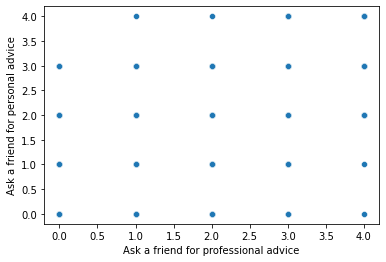

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = df["q0007_0001"], y = df["q0007_0002"]);
plt.xlabel("Ask a friend for professional advice")
plt.ylabel("Ask a friend for personal advice")
plt.show()

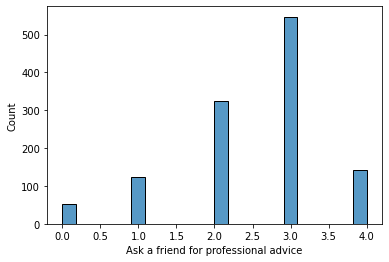

In [114]:
sns.histplot(x = df["q0007_0001"]);
plt.xlabel("Ask a friend for professional advice")
plt.show()

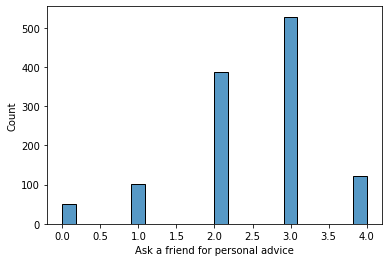

In [115]:
sns.histplot(x = df["q0007_0002"]);
plt.xlabel("Ask a friend for personal advice")
plt.show()

In [116]:
print(df[cols_to_map].head())

   q0007_0001  q0007_0002  q0007_0003  ...  q0007_0009  q0007_0010  q0007_0011
0         4.0         4.0         4.0  ...         3.0         0.0         4.0
1         2.0         3.0         1.0  ...         0.0         3.0         2.0
2         3.0         3.0         3.0  ...         3.0         2.0         0.0
3         2.0         2.0         3.0  ...         2.0         0.0         0.0
4         3.0         2.0         0.0  ...         2.0         1.0         3.0

[5 rows x 11 columns]


## Build the KMeans Model

In [117]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)
model.fit(df[cols_to_map])
print(model.cluster_centers_)

[[1.94394619 1.88565022 0.97085202 1.71300448 0.52690583 2.87443946
  0.08071749 2.7735426  2.17488789 0.60986547 1.65022422]
 [2.84387618 2.83983849 2.8371467  2.41453567 0.70121131 2.7846568
  0.49125168 3.00269179 2.82907133 1.50605653 2.36069987]]


In [118]:
print(model.labels_)

[1 0 1 ... 1 0 0]


## Separate the Cluster Members

In [119]:
cluster_zero_indices = []
cluster_one_indices = []
for i in range(len(model.labels_)):
  if model.labels_[i] == 0:
    cluster_zero_indices.append(i)
  elif model.labels_[i] == 1:
    cluster_one_indices.append(i)

## Investigate the Cluster Members

In [120]:
cluster_one_df = df.iloc[cluster_one_indices]
cluster_zero_df = df.iloc[cluster_zero_indices]

In [121]:
print(cluster_zero_df["educ4"].value_counts()/len(cluster_zero_df))
print("*************")
print(cluster_one_df["educ4"].value_counts()/len(cluster_one_df))

College or more         0.325112
Some college            0.280269
Post graduate degree    0.260090
High school or less     0.132287
Name: educ4, dtype: float64
*************
Post graduate degree    0.367429
College or more         0.306864
Some college            0.244953
High school or less     0.080754
Name: educ4, dtype: float64


In [122]:
print(cluster_zero_df["orientation"].value_counts()/len(cluster_zero_df))
print("*************")
print(cluster_one_df["orientation"].value_counts()/len(cluster_one_df))

Straight        0.946188
Gay/Bisexual    0.035874
Other           0.008969
No answer       0.006726
Name: orientation, dtype: float64
*************
Straight        0.827725
Gay/Bisexual    0.144011
Other           0.024226
No answer       0.004038
Name: orientation, dtype: float64


In [123]:
print(cluster_zero_df["kids"].value_counts()/len(cluster_zero_df))
print("*************")
print(cluster_one_df["kids"].value_counts()/len(cluster_one_df))

Has children    0.704036
No children     0.289238
Name: kids, dtype: float64
*************
Has children    0.678331
No children     0.317631
Name: kids, dtype: float64


In [124]:
print(cluster_zero_df["age3"].value_counts())
print("*************")
print(cluster_one_df["age3"].value_counts())

65 and up    246
35 - 64      178
18 - 34       21
Name: age3, dtype: int64
*************
35 - 64      360
65 and up    335
18 - 34       48
Name: age3, dtype: int64
